import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Cross Validation

Up to now, we've seen how to: 

1. Choose a class of model
2. Select different model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data


### Model validation the wrong way

Let's demonstrate the naive approach to validation using the credit dataset

In [1]:
dataset = pd.read_csv('titanic_processed.csv')
dataset

<IPython.core.display.Javascript object>

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,1,0,0,1,0
1,1,38.0,1,0,71.2833,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,0,1,1
4,3,35.0,0,0,8.0500,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
707,3,39.0,0,5,29.1250,0,0,1,0,0
708,2,27.0,0,0,13.0000,1,0,0,1,0
709,1,19.0,0,0,30.0000,0,0,0,1,1
710,1,26.0,0,0,30.0000,1,1,0,0,1


In [2]:
X = dataset.drop(columns='Survived')
y = dataset.Survived

In [3]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
707,3,39.0,0,5,29.1250,0,0,1,0
708,2,27.0,0,0,13.0000,1,0,0,1
709,1,19.0,0,0,30.0000,0,0,0,1
710,1,26.0,0,0,30.0000,1,1,0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
model = DecisionTreeClassifier()
model.fit(X, y)
y_pred = model.predict(X)

In [6]:
from sklearn.metrics import plot_roc_curve

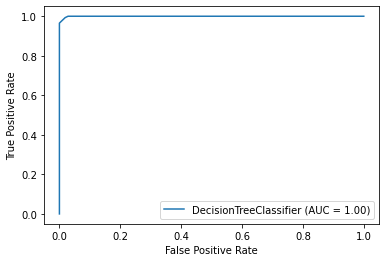

In [7]:
plot_roc_curve(model, X, y)

# The way we do it - HOLDOUT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

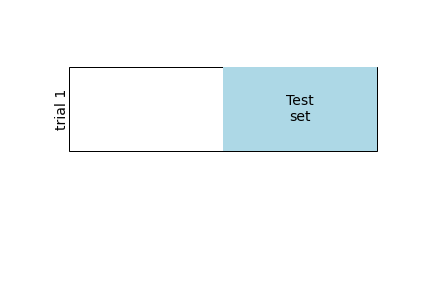

In [8]:
def draw_one_rect(N, ax, textprop={}):
    for i in range(N):
        if i == 1:
            ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white', ec='k'),)
            ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightblue'))
            ax.text(5. * (i + 0.5) / N, i + 0.35,
                    "Test\nset", ha='center', va='center', **textprop)
            ax.text(0, i + 0.35, "trial {0}".format(N - i),
                    ha='right', va='center', rotation=90, **textprop)
            ax.set_xlim(-1, 6)
            ax.set_ylim(-0.2, N + 0.2)
            
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_one_rect(2, ax, textprop=dict(size=14))

How many do we choose to be part of the test set?

Learning Curve is the answer for that.

For the example above, we lost 50% of our data to test the model.

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [10]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [11]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

# fit the model on one set of data
model.fit(X_train, y_train)

# evaluate the model on the second set of data
score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
score

0.7471624266144814

# Comparar o resultado do treino com o resultado do teste

<IPython.core.display.Javascript object>

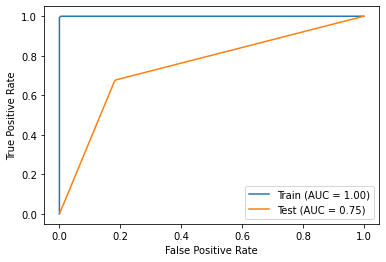

In [12]:
fig, ax = plt.subplots()
plot_roc_curve(model, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(model, X_test, y_test, ax=ax, name='Test')

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.01)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<IPython.core.display.Javascript object>

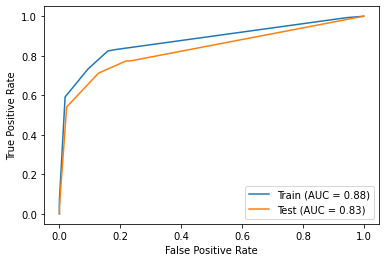

In [14]:
fig, ax = plt.subplots()
plot_roc_curve(model, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(model, X_test, y_test, ax=ax, name='Test')

## However, what's going on in this process? What's wrong with it?

Tests in machine learning are thought to be destructive. If you want to tune your model, you can't have access to the test. The test is supposed to be hidden from you until the last minute. 

It is true, though, that the best estimate for a True error is the estimative from the `Test set`. But how do we do that, then?

# Resampling Test Set

Run multiple times with different Training and Test Sets.

In [15]:
from sklearn.metrics import roc_auc_score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

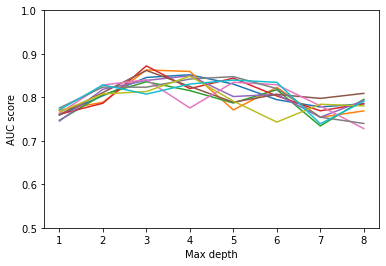

In [16]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8]
mean_scores = []
std_scores  = []

for i in range(10):
    
    auc_score = []
    
    for max_depth in max_depths:
        model = DecisionTreeClassifier(max_depth=max_depth)

        # split the data with 50% in each set - remove random_state here.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        # fit the model on one set of data
        model.fit(X_train, y_train)

        # evaluate the model on the second set of data
        auc_score.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    plt.plot(max_depths, auc_score)
    plt.xlabel('Max depth')
    plt.ylabel('AUC score')
    mean_scores.append(np.mean(auc_score))
    std_scores.append(np.std(auc_score))
    
    plt.ylim([0.5, 1])

Drawbacks: 
- You are always loosing data when doing this.
- You are looking at the test too much.

# Cross Validation

In [17]:
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white', ec='k'),)
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightblue'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "Validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "trial {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

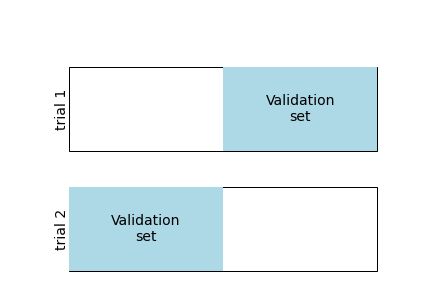

In [18]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(2, ax, textprop=dict(size=14))

**Inside our own** `Training Set`, we can separate into piece of `Training space` and what is called `Validation Space` or `Validation Set`.

You should, then, **tune** your model using the validation set. After tuning your model, after being satisfied with your results, you can then calculate an estimative of the error on the Test Set. This will be your best estimate of the training error. You then, guarantee that you are tuning your model **AND** not overfitting on your test data.

# KFold CV

K-Fold means you will separate your `Training Set` into K pieces. You'll run the model K times and use each of the piece once as the `validation set`.

In the end, you'll be able to obtain K scores of your model. You can then take the average of your results and check the standard deviation (you don't want your model to be too dispersive).

**K = 5** example

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(2, 5, 'Training Set')

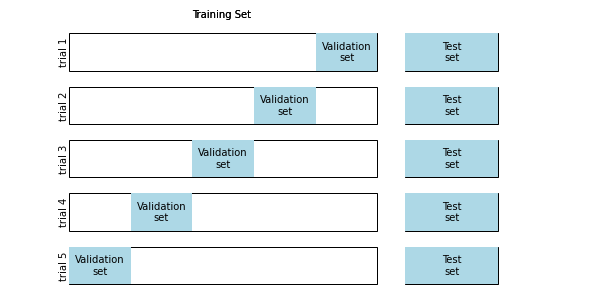

In [69]:
N = 5
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(N, ax, textprop=dict(size=10))
# adicionar imagem do test-set

ax2 = fig.add_axes([.85, 0, .5, 1])
ax2.axis('off')


for i in range(N):
    ax2.add_patch(plt.Rectangle((0, i), 3, 0.7, fc='white', ec='k'),)
    ax2.add_patch(plt.Rectangle((0, i), 3, 0.7, fc='lightblue'))
    ax2.text(1.5, i + 0.35, "Test\nset", ha='center', va='center')
    
ax2.set_xlim(-1, 6)
ax2.set_ylim(-0.2, N + 0.2)

ax.text(2, 5, 'Training Set')
ax.text(2, 5, 'Training Set')

In [70]:
from sklearn.model_selection import KFold, StratifiedKFold

In [74]:
y.mean()

0.4044943820224719

In [75]:
y_test.mean()

0.4014084507042254

In [76]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [77]:
y_train.mean()

0.4044943820224719

In [78]:
y_test.mean()

0.4044943820224719

In [79]:
y.mean()

0.4044943820224719

## In Practice, how do we do that?

Create a cross validation object and split it to obtain `train and test indexes`.

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [21]:
my_cv = KFold(5, shuffle=True)



In [22]:
splits = list(my_cv.split(X))

In [23]:
splits[2][1]

array([  4,   7,  12,  24,  25,  26,  36,  41,  42,  43,  49,  50,  57,
        61,  62,  80,  81,  88,  96,  98, 105, 110, 114, 115, 116, 123,
       134, 146, 152, 154, 159, 169, 170, 176, 181, 185, 191, 192, 204,
       219, 223, 228, 233, 236, 239, 242, 263, 267, 268, 272, 281, 283,
       284, 287, 288, 295, 297, 300, 304, 310, 315, 326, 329, 330, 331,
       335, 336, 337, 338, 339, 340, 342, 343, 349, 356, 360, 362, 370,
       378, 381, 383, 401, 407, 408, 412, 415, 417, 440, 442, 445, 479,
       487, 493, 495, 496, 497, 500, 506, 507, 514, 517, 527, 528, 533,
       534, 536, 537, 547, 550, 554, 561, 562, 568, 572, 575, 577, 578,
       590, 594, 595, 597, 602, 604, 621, 622, 625, 628, 635, 652, 655,
       660, 664, 665, 673, 680, 683, 690, 693, 695, 696, 699, 711])

In [24]:
scores_train = []
scores_test = []

model = DecisionTreeClassifier(max_depth=3)

for train_index, test_index in my_cv.split(X):
    
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    
    model.fit(X_train, y_train)
    scores_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))
    scores_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    

In [25]:
(np.mean(scores_train), np.std(scores_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.8726424484021837, 0.010374592248560716)

In [26]:
(np.mean(scores_test), np.std(scores_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.8452893271557462, 0.0165141398371366)

## Automated method that does that for us

In [27]:
# an easier way
from sklearn.model_selection import cross_val_score

In [28]:
model = DecisionTreeClassifier(max_depth=3)

In [29]:
cross_val_score(model, X, y, cv=KFold(10, shuffle=True), scoring='roc_auc', n_jobs=-1)

array([0.90597954, 0.88107639, 0.81422764, 0.87602627, 0.86001642,
       0.89361702, 0.73758865, 0.86111111, 0.80403226, 0.90813008])

In [30]:
cross_val_score(model, X, y, cv=KFold(10, shuffle=True), scoring='precision', n_jobs=-1)

array([0.82758621, 0.88      , 0.81818182, 0.85185185, 0.63636364,
       0.66666667, 0.78571429, 0.90909091, 0.85185185, 0.71428571])

In [31]:
np.mean(cross_val_score(model, X, y, cv=KFold(10, shuffle=True), scoring='precision', n_jobs=-1))

<IPython.core.display.Javascript object>

0.7925827660664617

In [32]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

# Leave One Out - LOOCV

Leave one out is a specific case of KFold. It uses all the dataset for training and just leave one observation out for testing. Then repeat this process N times (N being the number of observations). This is the same as specifying KFold(N).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

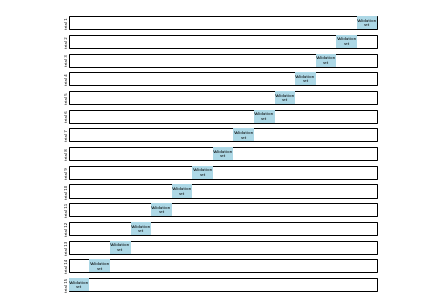

In [33]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(15, ax, textprop=dict(size=4))


In [80]:
cross_val_score(model, X, y, cv=KFold(len(X)))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [35]:
np.mean(cross_val_score(model, X, y, cv=KFold(len(X))))

<IPython.core.display.Javascript object>

0.8160112359550562

In [36]:
y.value_counts(normalize=True)

0    0.595506
1    0.404494
Name: Survived, dtype: float64

This method is good when you have a small number of observations. But when you have a big dataset, this process starts to get too slow and costly.

In [37]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
np.mean(scores)

<IPython.core.display.Javascript object>

0.8160112359550562

# Learning Curve

In [81]:
model = DecisionTreeClassifier()

In [82]:
from sklearn.model_selection import learning_curve

curve = learning_curve(model, X, y, cv=KFold(3))

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

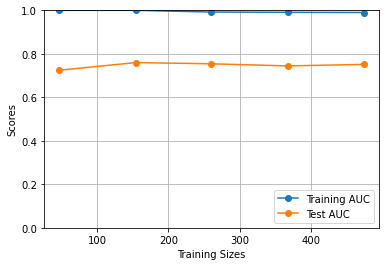

In [84]:
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0., 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

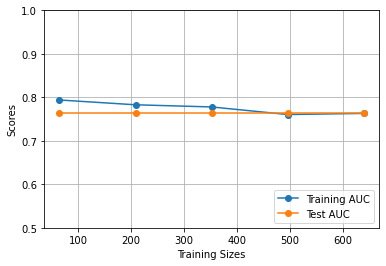

In [104]:
model = DecisionTreeClassifier(max_depth=1)

from sklearn.model_selection import learning_curve

curve = learning_curve(model, X, y, cv=KFold(10), scoring='roc_auc')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]

plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0.5, 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

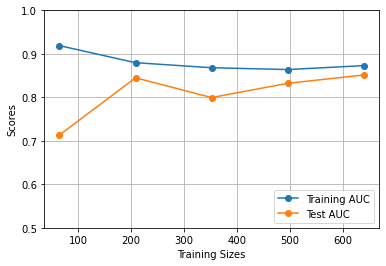

In [103]:
model = DecisionTreeClassifier(max_depth=3)

from sklearn.model_selection import learning_curve

curve = learning_curve(model, X, y, cv=KFold(10), scoring='roc_auc')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]

plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0.5, 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [46]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), random_state=None):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True, random_state=random_state)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - 1.96 * train_scores_std,
                         train_scores_mean + 1.96 * train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - 1.96 * test_scores_std,
                         test_scores_mean + 1.96 * test_scores_std, alpha=0.1,
                         color="g")
    
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<IPython.core.display.Javascript object>

In [91]:
model = DecisionTreeClassifier(max_depth=1)

c:\programas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

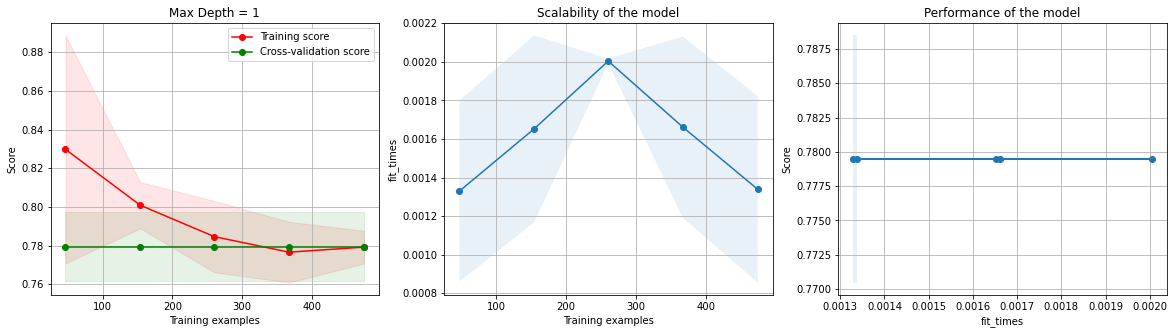

In [94]:
plot_learning_curve(model, 'Max Depth = 1', X, y, cv=KFold(3, shuffle=False, random_state=42), random_state=4);

c:\programas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

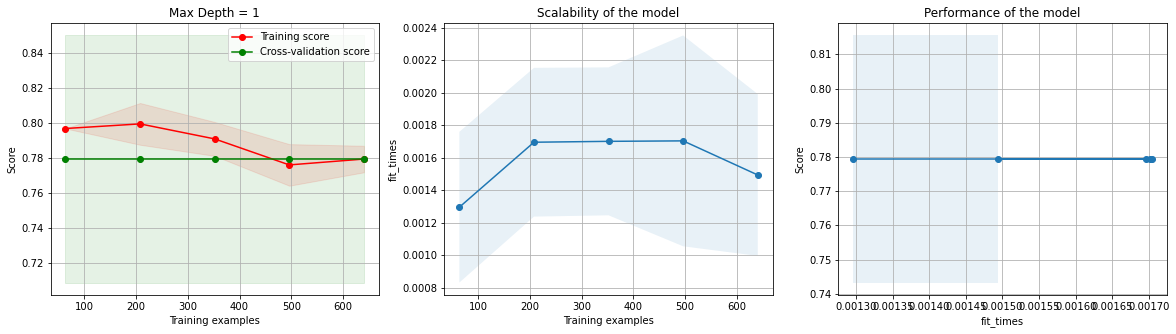

In [100]:
model = DecisionTreeClassifier(max_depth=3)
plot_learning_curve(model, 'Max Depth = 1', X, y, cv=KFold(10, shuffle=False, random_state=42), random_state=4);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

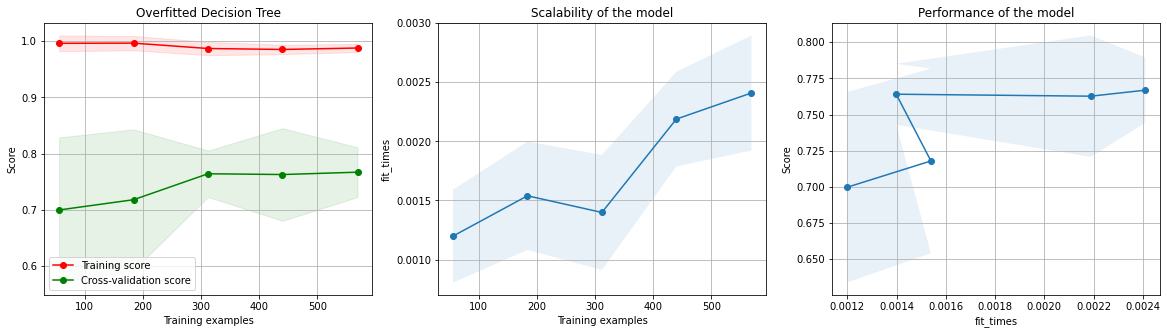

In [90]:
model = DecisionTreeClassifier()
plot_learning_curve(model, 'Overfitted Decision Tree', X, y, cv=KFold(5), random_state=42);